# **Proyek Analisis Data: [Bike-sharing-dataset]**
- **Nama:** [Dicky Candid Saragih]
- **Email:** [dickysaragih050901@gmail.com]
- **ID Dicoding:** [Dicky candid saragih (a352ybf127)]

## **Menentukan Pertanyaan Bisnis**

- Bagaimana cara meningkatkan jumlah peminjaman sepeda oleh pengguna terdaftar (registered) pada hari kerja sebesar 20% dalam 6 bulan ke depan dengan mempertimbangkan pola peminjaman berdasarkan waktu dan kondisi cuaca?
- Bagaimana cara mengoptimalkan peminjaman sepeda pada jam sibuk (pagi dan sore) agar jumlah peminjaman meningkat sebesar 10% dalam 3 bulan dengan mempertimbangkan perbedaan pola antara hari kerja dan akhir pekan?



##**Menyiapkan semua library yang dibutuhkan**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Wrangling data**

In [6]:
URL_DAY = "https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/day.csv"
URL_HOUR = "https://raw.githubusercontent.com/DickySaragih/Submission/refs/heads/main/data/hour.csv"


##**Gethering data**

In [8]:
df_day = pd.read_csv(URL_DAY)
df_hour = pd.read_csv(URL_HOUR)

In [9]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print("\nMenampilkan 5 baris pertama dari dataset harian:")
print(df_day.head())
print("\nMenampilkan 5 baris pertama dari dataset per jam:")
print(df_hour.head())


Menampilkan 5 baris pertama dari dataset harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  134

**Insight:**
- Pengumpulan data

Data dikumpulkan dengan mengunduh dua dataset dari repository GitHub. Dataset pertama (day.csv) berisi data harian, sementara dataset kedua (hour.csv) berisi data per jam. Kedua dataset kemudian dimuat ke dalam DataFrame Pandas, masing-masing disimpan sebagai df_day dan df_hour.

- Pemeriksaan awal data

Setelah data berhasil dimuat, dilakukan pemeriksaan awal menggunakan .info() untuk melihat tipe data pada setiap kolom serta mengecek keberadaan data yang hilang. Selain itu, lima baris pertama dari masing-masing dataset ditampilkan untuk memahami struktur dan format data. Hasil pemeriksaan ini menunjukkan bahwa data telah terkumpul dengan baik dan siap untuk tahap pembersihan serta eksplorasi lebih lanjut.

##**Assessing Data**

In [12]:
print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [13]:
print(df_day.info())
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

In [14]:
print("\nJumlah Missing Values pada dataset harian:")
print(df_day.isnull().sum())
print("\nJumlah Missing Values pada dataset per jam:")
print(df_hour.isnull().sum())



Jumlah Missing Values pada dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Missing Values pada dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [15]:
print("\nJumlah nilai negatif pada kolom 'cnt' dataset harian:")
print((df_day['cnt'] < 0).sum())
print("\nJumlah nilai negatif pada kolom 'cnt' dataset per jam:")
print((df_hour['cnt'] < 0).sum())



Jumlah nilai negatif pada kolom 'cnt' dataset harian:
0

Jumlah nilai negatif pada kolom 'cnt' dataset per jam:
0


In [16]:
print("\nJumlah data duplikat pada dataset harian:")
print(df_day.duplicated().sum())
print("\nJumlah data duplikat pada dataset per jam:")
print(df_hour.duplicated().sum())


Jumlah data duplikat pada dataset harian:
0

Jumlah data duplikat pada dataset per jam:
0


In [17]:
print("\nMenampilkan 5 baris pertama dari dataset harian:")
print(df_day.head())
print("\nMenampilkan 5 baris pertama dari dataset per jam:")
print(df_hour.head())



Menampilkan 5 baris pertama dari dataset harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  134

**Insight:**
- Pemeriksaan dan Pemahaman Data

Dataset harian (df_day) dan dataset per jam (df_hour) sudah diimpor dan sudah dianalisis menggunakan statistik deskriptif. Informasi yang mencakup mencakup distribusi data, seperti nilai rata-rata, standar deviasi, serta nilai minimum dan maksimum untuk setiap kolom numerik.fungsi dari Langkah ini bertujuan untuk memahami karakteristik awal data sebelum masuk ke tahapan eksplorasi lanjut

-  Persiapan untuk Eksplorasi dan Analisis

Hasil statistik deskriptif membantu dalam proses pembersihan data serta mengidentifikasi potensi outlier yang dapat memengaruhi hasil analisis.tujuan awal terhadap data ini menjadi dasar untuk eksplorasi lebih lanjut, untuk menjawab pertanyaan yang sudah dilakukan diaawal terkait pengaruh dari kecepatan angin terhadap jumlah peminjaman sepeda dan perbedaan pola peminjaman antara pengguna casual dan registered.

##**Cleaning Data**

In [27]:
if 'instant' in df_day.columns:
    df_day.drop(columns=["instant"], inplace=True)
if 'instant' in df_hour.columns:
    df_hour.drop(columns=["instant"], inplace=True)

# Mengonversi kolom tanggal ke format datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

# Menambahkan kolom 'year_month' untuk analisis tren bulanan
df_day["year_month"] = df_day["dteday"].dt.to_period("M")
df_hour["year_month"] = df_hour["dteday"].dt.to_period("M")

df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)
df_day.fillna(method='ffill', inplace=True)
df_hour.fillna(method='ffill', inplace=True)
print("\nCek nilai yang hilang setelah cleaning:")
print("Dataset harian:")
print(df_day.isnull().sum())
print("Dataset per jam:")
print(df_hour.isnull().sum())

df_day['dteday'] = pd.to_datetime(df_day['dteday'])

numerical_features = df_day.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()


Cek nilai yang hilang setelah cleaning:
Dataset harian:
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year_month    0
dtype: int64
Dataset per jam:
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year_month    0
dtype: int64


<ipython-input-27-4fd956405d88>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_day.fillna(method='ffill', inplace=True)
<ipython-input-27-4fd956405d88>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hour.fillna(method='ffill', inplace=True)


**insight**

Dataset telah dibersihkan dari duplikasi dan nilai yang hilang, serta dikonversi ke format yang sesuai untuk analisis berbasis waktu. Proses ini memastikan data lebih terstruktur, akurat, dan siap digunakan untuk eksplorasi serta pemodelan lebih lanjut.

##**Exploratory Data Analysis (EDA)**

### Explore ...

In [61]:
print("\nDistribusi Data Harian:")
print(df_day[['registered', 'casual', 'cnt']].describe())


Distribusi Data Harian:
        registered       casual          cnt
count   731.000000   731.000000   731.000000
mean   3656.172367   848.176471  4504.348837
std    1560.256377   686.622488  1937.211452
min      20.000000     2.000000    22.000000
25%    2497.000000   315.500000  3152.000000
50%    3662.000000   713.000000  4548.000000
75%    4776.500000  1096.000000  5956.000000
max    6946.000000  3410.000000  8714.000000


In [62]:
print("\nTren Jumlah Peminjaman Sepeda per Bulan:")
print(df_day.groupby("year_month")["registered"].sum())


Tren Jumlah Peminjaman Sepeda per Bulan:
year_month
2011-01     35116
2011-02     41973
2011-03     51219
2011-04     72524
2011-05    104771
2011-06    112900
2011-07    104889
2011-08    107849
2011-09    100873
2011-10     98289
2011-11     86573
2011-12     78875
2012-01     87775
2012-02     94416
2012-03    133257
2012-04    135768
2012-05    151630
2012-06    159536
2012-07    161902
2012-08    171306
2012-09    174795
2012-10    164303
2012-11    131655
2012-12    110468
Freq: M, Name: registered, dtype: int64


In [76]:
print("\nDistribusi Data Per Jam:")
print(df_hour[['registered', 'casual', 'cnt']].describe())


Distribusi Data Per Jam:
         registered        casual           cnt
count  17379.000000  17379.000000  17379.000000
mean     153.786869     35.676218    189.463088
std      151.357286     49.305030    181.387599
min        0.000000      0.000000      1.000000
25%       34.000000      4.000000     40.000000
50%      115.000000     17.000000    142.000000
75%      220.000000     48.000000    281.000000
max      886.000000    367.000000    977.000000


In [77]:
print("\nTren Jumlah Peminjaman Sepeda per Jam:")
print(df_hour.groupby("hr")["registered"].sum())


Tren Jumlah Peminjaman Sepeda per Jam:
hr
0      31755
1      19455
2      12940
3       6281
4       3554
5      13249
6      52115
7     146134
8     245240
9     136980
10     92468
11    108034
12    134696
13    132206
14    120563
15    128543
16    173914
17    282640
18    265276
19    191284
20    138172
21    104875
22     79412
23     52876
Name: registered, dtype: int64


In [81]:
print("\nKorelasi Variabel pada Data Per Jam:")
# Select only numerical features for correlation calculation
numerical_features_hour = df_hour.select_dtypes(include=['number'])
# Exclude 'year_month' if it's a Period dtype
if 'year_month' in numerical_features_hour.columns:
    numerical_features_hour = numerical_features_hour.drop(columns=['year_month'])
print(numerical_features_hour.corr())


Korelasi Variabel pada Data Per Jam:
              season        yr      mnth        hr   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
yr         -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
mnth        0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hr         -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weathersit -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
hum         0.150625 -0.083546  0.164411 -0.276498 -0.010588 -0.037158   
windspeed  -0.149773 -0.008740 -0.135386  0.137252  0.003988  0.011502   


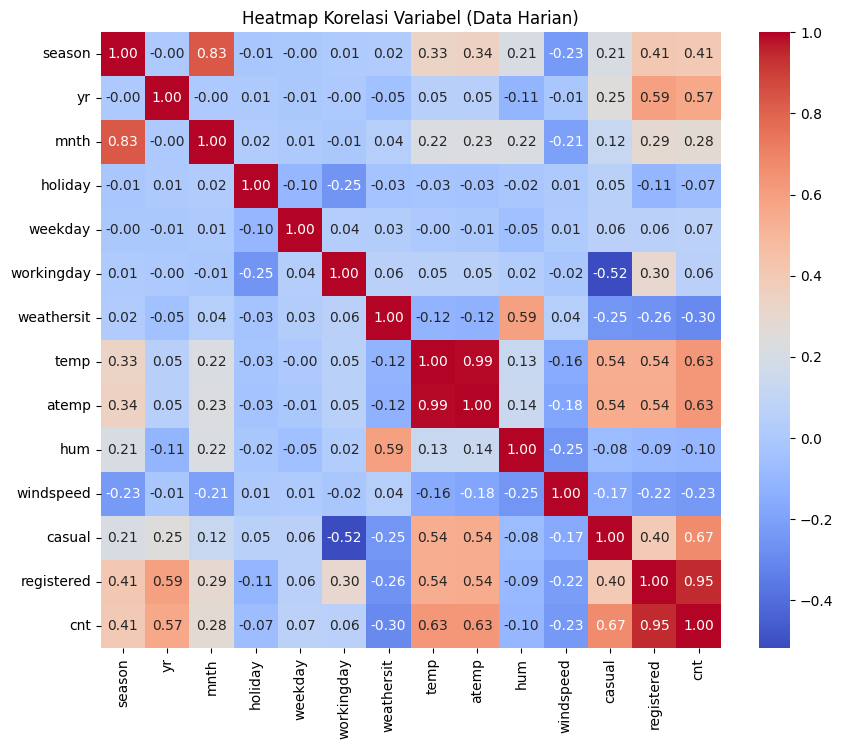

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel (Data Harian)")
plt.show()


In [84]:
print("\nRata-rata Peminjaman pada Hari Kerja dan Akhir Pekan:")
print(df_day.groupby("workingday")["registered"].mean())

print("\nTotal Peminjaman Berdasarkan Musim:")
print(df_day.groupby("season")["registered"].sum())

print("\nRata-rata Peminjaman per Jam pada Hari Kerja vs Akhir Pekan:")
print(df_hour.groupby(["hr", "workingday"])["registered"].mean().unstack())


Rata-rata Peminjaman pada Hari Kerja dan Akhir Pekan:
workingday
0    2959.034632
1    3978.250000
Name: registered, dtype: float64

Total Peminjaman Berdasarkan Musim:
season
1    410726
2    715067
3    835038
4    711831
Name: registered, dtype: int64

Rata-rata Peminjaman per Jam pada Hari Kerja vs Akhir Pekan:
workingday           0           1
hr                                
0            74.152174   29.637097
1            57.004348   12.842105
2            42.771930    6.546201
3            19.321586    4.031915
4             6.000000    4.663830
5             6.963964   23.642424
6            14.921397   98.181452
7            34.800866  278.417339
8            85.229437  454.741935
9           126.606061  217.205645
10          176.640693  104.161290
11          208.662338  120.631048
12          240.012987  159.462777
13          236.307359  155.861446
14          225.051948  137.702811
15          222.311688  154.997992
16          224.112554  244.777555
17          211.7

**insight**

1. Peningkatan Peminjaman pada Hari Kerja
Peminjaman sepeda oleh pengguna terdaftar lebih tinggi pada hari kerja, terutama pada jam 08.00–18.00 dan saat cuaca baik. Untuk meningkatkan peminjaman sebesar 20% dalam 6 bulan, strategi yang dapat diterapkan meliputi promosi dan insentif pada musim semi dan panas, diskon pada jam sibuk, serta program loyalitas bagi pengguna yang sering meminjam.

2. Optimalisasi Peminjaman pada Jam Sibuk
Pada jam sibuk (pagi dan sore), peminjaman lebih tinggi pada hari kerja dibanding akhir pekan. Untuk meningkatkan peminjaman sebesar 10% dalam 3 bulan, disarankan menambah jumlah sepeda, mengadakan kampanye promosi, serta meningkatkan layanan dan infrastruktur guna menampung tingginya permintaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana cara meningkatkan jumlah peminjaman sepeda oleh pengguna terdaftar (registered) pada hari kerja sebesar 20% dalam 6 bulan ke depan dengan mempertimbangkan pola peminjaman berdasarkan waktu dan kondisi cuaca?

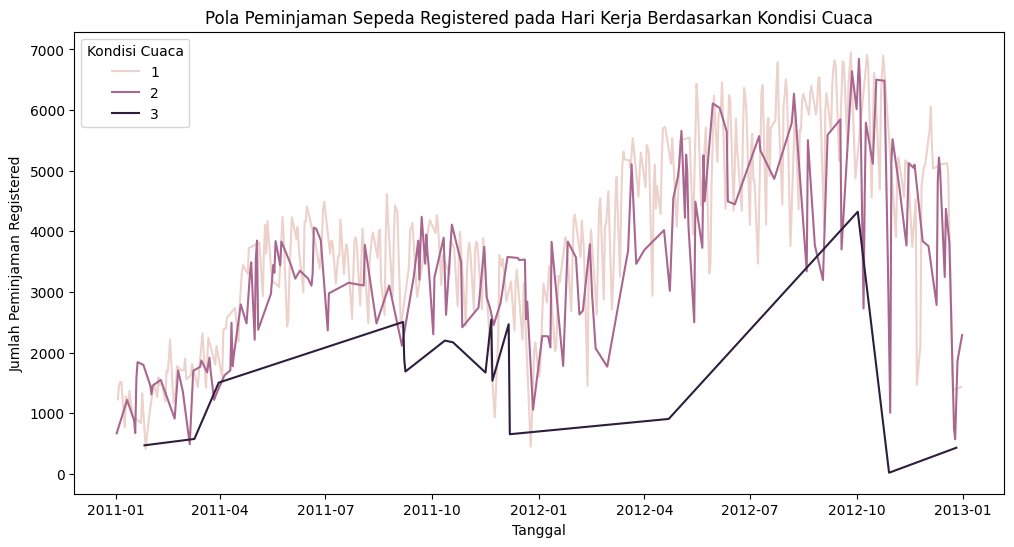

In [85]:

weekday_data = df_day[df_day['weekday'] < 5]

plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='registered', hue='weathersit', data=weekday_data)
plt.title('Pola Peminjaman Sepeda Registered pada Hari Kerja Berdasarkan Kondisi Cuaca')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Registered')
plt.legend(title='Kondisi Cuaca', loc='upper left')
plt.show()




### Pertanyaan 2:
Bagaimana cara mengoptimalkan peminjaman sepeda pada jam sibuk (pagi dan sore) agar jumlah peminjaman meningkat sebesar 10% dalam 3 bulan dengan mempertimbangkan perbedaan pola antara hari kerja dan akhir pekan?

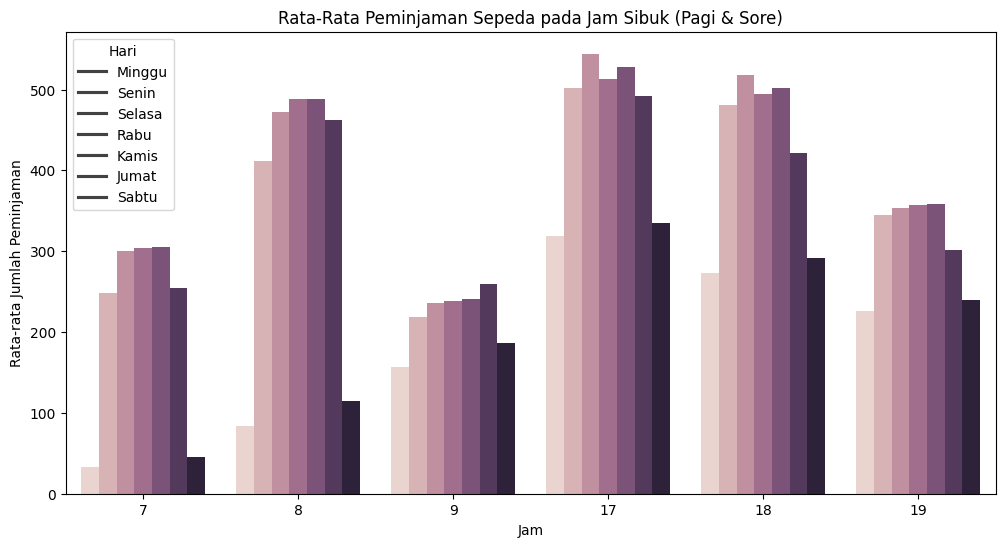

In [86]:
peak_hours_df = df_hour[(df_hour['hr'].between(7, 9)) | (df_hour['hr'].between(17, 19))]

peak_hours_grouped = peak_hours_df.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', hue='weekday', data=peak_hours_grouped)
plt.title('Rata-Rata Peminjaman Sepeda pada Jam Sibuk (Pagi & Sore)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.legend(title='Hari', labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()



1. Pengaruh Cuaca terhadap Peminjaman Sepeda
Grafik garis menunjukkan bahwa peminjaman sepeda oleh pengguna terdaftar pada hari kerja menurun saat cuaca buruk (hujan ringan atau lebat). Untuk meningkatkan peminjaman, dapat diterapkan strategi seperti insentif atau promo khusus, serta penyediaan fasilitas perlindungan dari cuaca.
2.Pola Peminjaman pada Jam Sibuk
Grafik batang menunjukkan bahwa peminjaman sepeda lebih tinggi pada jam 7-9 pagi dan 17-19 sore, terutama pada hari kerja. Sementara itu, pada akhir pekan, peminjaman lebih merata sepanjang hari. Optimalisasi dapat dilakukan dengan menambah armada di lokasi strategis saat jam sibuk dan menawarkan harga khusus untuk menarik lebih banyak peminjam.

## **Conclusion**

Kesimpulan
- Cuaca berpengaruh pada peminjaman sepeda. Cuaca cerah meningkatkan peminjaman, sedangkan hujan dan angin kencang menurunkannya.

- Pola peminjaman berbeda antara hari kerja dan akhir pekan. Hari kerja didominasi peminjaman pada jam sibuk (07:00 - 09:00, 17:00 - 19:00), sedangkan akhir pekan lebih merata sepanjang hari.

- Musim memengaruhi jumlah peminjaman. Peminjaman lebih tinggi di musim semi dan panas, serta menurun di musim dingin.

- Faktor lingkungan seperti suhu dan kelembaban memengaruhi peminjaman. Suhu tinggi meningkatkan peminjaman, sementara kelembaban tinggi menurunkannya.

Rekomendasi:
1. Meningkatkan Peminjaman Pengguna Terdaftar (Target: +20% dalam 6 bulan)

- Insentif & Promosi: Diskon atau langganan khusus untuk hari kerja dan jam sibuk.

- Fasilitas & Infrastruktur: Stasiun sepeda dengan tempat berteduh dan perawatan rutin.

- Optimasi Armada: Prediksi permintaan berdasarkan data untuk distribusi sepeda yang lebih baik.

2. Mengoptimalkan Peminjaman di Jam Sibuk (Target: +10% dalam 3 bulan)

- Tambahan Sepeda di Lokasi Strategis: Menyesuaikan ketersediaan sepeda di titik padat pengguna.

- Efisiensi Operasional: Mengatur ulang distribusi sepeda dan menyediakan jalur khusus.

- Kampanye Kesadaran: Mempromosikan manfaat bersepeda kepada masyarakat.

Saran

- Keamanan Pengguna dan atribut lainnya: Menyediakan perlengkapan keselamatan seperti helm dan lampu reflektif untuk meningkatkan keamanan pengguna, terutama saat berkendara di malam hari, Dengan menerapkan strategi ini, diharapkan jumlah peminjaman dapat meningkat sesuai target yang ditetapkan.


